## A notebook to perform PCA on EEG data
#### Shateesh Bhugwansing


### Emmanuil's preprocessing code (ICA) : 

In [1]:
%run ../preprocessing/Artifact_Removal/preprocecssing_helpers.ipynb
import os

import mne
from mne.preprocessing import ICA
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (50.0, 30.0)
matplotlib.rcParams.update({'font.size': 15})

In [34]:
path = '/Volumes/SB/eegData_SETfiles/Stroop_EEG_Data_300s'
eeglab_files = os.listdir(path)

In [35]:
eeglab_dict = search_folders(path, eeglab_files)
eeglab_files = paths_of_eeglab_files(path, eeglab_dict)
eeglab_files

['/Volumes/SB/eegData_SETfiles/Stroop_EEG_Data_300s/SA20140304/20140304_1418.set',
 '/Volumes/SB/eegData_SETfiles/Stroop_EEG_Data_300s/SA20140304/20140304_1614.set',
 '/Volumes/SB/eegData_SETfiles/Stroop_EEG_Data_300s/SA20140306/20140306_1133.set',
 '/Volumes/SB/eegData_SETfiles/Stroop_EEG_Data_300s/SA20140306/20140306_1338.set',
 '/Volumes/SB/eegData_SETfiles/Stroop_EEG_Data_300s/SA20140313/20140313_1439.set',
 '/Volumes/SB/eegData_SETfiles/Stroop_EEG_Data_300s/SA20140313/20140313_1630.set',
 '/Volumes/SB/eegData_SETfiles/Stroop_EEG_Data_300s/SA20140314/20140314_1424.set',
 '/Volumes/SB/eegData_SETfiles/Stroop_EEG_Data_300s/SA20140314/20140314_1553.set',
 '/Volumes/SB/eegData_SETfiles/Stroop_EEG_Data_300s/SA20140318/20140318_1043.set',
 '/Volumes/SB/eegData_SETfiles/Stroop_EEG_Data_300s/SA20140318/20140318_1211.set',
 '/Volumes/SB/eegData_SETfiles/Stroop_EEG_Data_300s/SA20140319/20140319_1043.set',
 '/Volumes/SB/eegData_SETfiles/Stroop_EEG_Data_300s/SA20140319/20140319_1342.set',
 '/V

In [4]:
raw = mne.io.read_raw_eeglab(eeglab_files[0], preload=True)

Reading /Volumes/SB/eegData_SETfiles/Stroop_EEG_Data_300s/SA20140304/20140304_1418.fdt
Reading 0 ... 1273369  =      0.000 ...  2487.049 secs...


In [5]:
picks = mne.pick_types(raw.info, meg = False, eeg= True, eog= False, stim = False)


In [6]:
# raw.plot();


In [7]:
raw.notch_filter(np.arange(60,241,60), filter_length='auto', phase = 'zero')
raw.filter(5,100, fir_design='firwin')

Setting up band-stop filter
Filter length of 3379 samples (6.600 sec) selected
Setting up band-pass filter from 5 - 1e+02 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 25.0 Hz
Filter length of 845 samples (1.650 sec) selected


<RawEEGLAB  |  20140304_1418.fdt, n_channels x n_times : 129 x 1273370 (2487.0 sec), ~1.22 GB, data loaded>

In [8]:
ica = ICA(n_components=None, max_iter = 1000, random_state = 42)

In [9]:
ica.fit(raw,picks = None, decim=3, reject=dict(mag=4e-12, grad=4000e-13))

Fitting ICA to data using 128 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Using all PCA components: 128
Fitting ICA took 288.1s.


<ICA  |  raw data decomposition, fit (fastica): 424422 samples, 128 components, channels used: "eeg">

In [10]:
ica.detect_artifacts(raw,start_find=None, stop_find=None, ecg_ch=None, 
                     ecg_score_func='pearsonr', skew_criterion=None, 
                     kurt_criterion=None, var_criterion=None,add_nodes=None)

    Searching for artifacts...
Artifact indices found:
    
Ready.


<ICA  |  raw data decomposition, fit (fastica): 424422 samples, 128 components, channels used: "eeg">

In [11]:
# ica.plot_sources(raw);

In [12]:
raw_ica = ica.apply(raw)

Transforming to ICA space (128 components)
Zeroing out 0 ICA components


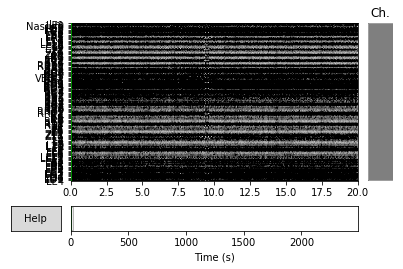

In [13]:
raw_ica.plot(duration=20,  n_channels=128);

In [14]:
m_event = mne.find_events(raw_ica, min_duration=1/raw.info['sfreq'], shortest_event= 0.5, initial_event=True)

7932 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 128 129 130 131 132 133 134 135 136 137 138
 139 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]


In [15]:
raw.add_events = m_event

In [16]:
# event_id : this dictionary is created from information from Dave's dissertation page 27
concepts={1:'BABY',2:'BELL',3:'BIRD',4:'BURP',5:'DOG',6:'DRUM',
              7:'KNOCK',8:'LAUGH',9:'PHONE',10:'TRAIN',11:'WATER'}

event_id = {'trail_start':  31, 
            'left_button':  131, 
            'right_button': 132,
            'congruent':    133,
            'incongruent':  134,
            'correct':      129,
            'incorrect':    130,
            # targets
            't_baby' :        135,
            't_bell':         136,
            't_bird':         137,
            't_burp':         138,
            't_dog':          139,
            't_drum':         140,
            't_knock':        141,
            't_laugh':        142,
            't_phone':        143,
            't_train':        144,
            't_water':        145,
            #flankers
            'f_baby' :        155,
            'f_bell':         156,
            'f_bird':         157,
            'f_burp':         158,
            'f_dog':          159,
            'f_drum':         160,
            'f_knock':        161,
            'f_laugh':        162,
            'f_phone':        163,
            'f_train':        164,
            'f_water':        165,
}
# event codes 1 - 24 represent flanker and target stim codes. They are NOT explicity defined in dissertation.
for i in range(1,13):
    event_id["flanker_stim_{0}".format(i)] = i
    
for j in range(13, 25):
    event_id["target_stim_{0}".format(j)] = j

In [17]:
epoch = mne.Epochs(raw_ica, events=m_event, event_id = event_id, preload = True, )

7931 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 7931 events and 359 original time points ...
0 bad epochs dropped


In [18]:
epoch.resample(256);

In [ ]:
# epoch.plot(n_channels=20, n_epochs=20, title="epochs")

### PCA 

In [19]:
from mne.datasets import sample
from mne.decoding import UnsupervisedSpatialFilter

from sklearn.decomposition import PCA

In [20]:
pca = UnsupervisedSpatialFilter(PCA(9), average=False) # PCA, keep 9 components 

epoch_data = epoch.get_data()
pca_data = pca.fit_transform(epoch_data)

In [38]:
tmin, tmax = 0.0, 2.1
ev = mne.EvokedArray(np.mean(pca_data, axis=0),
                     mne.create_info(9, epoch.info['sfreq'],
                                     ch_types='eeg'), tmin=tmin)

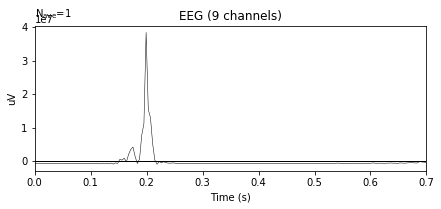

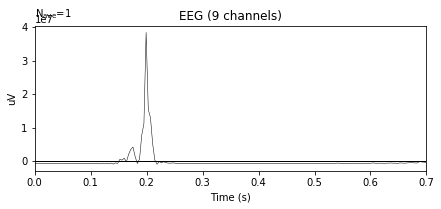

In [39]:
ev.plot(show=False, window_title="PCA", time_unit='s')


In [32]:
print(epoch_data.shape, pca_data.shape)

(7931, 129, 180) (7931, 9, 180)


In [41]:
epoch.events

array([[   5552,       0,     131],
       [   5880,       0,      31],
       [   5882,       0,     135],
       ...,
       [1257018,       0,     131],
       [1257241,       0,     134],
       [1257244,       0,     129]])

In [42]:
epoch.info

<Info | 17 non-empty fields
    bads : list | 0 items
    buffer_size_sec : float | 1.0
    ch_names : list | Lm, LE1, Nasium, LE3, LD2, LD5, LC3, LC6, LB1, ...
    chs : list | 129 items (EEG: 128, STIM: 1)
    comps : list | 0 items
    custom_ref_applied : bool | False
    dev_head_t : Transform | 3 items
    dig : list | 128 items
    events : list | 0 items
    highpass : float | 5.0 Hz
    hpi_meas : list | 0 items
    hpi_results : list | 0 items
    lowpass : float | 100.0 Hz
    nchan : int | 129
    proc_history : list | 0 items
    projs : list | 0 items
    sfreq : float | 256.0 Hz
    acq_pars : NoneType
    acq_stim : NoneType
    ctf_head_t : NoneType
    description : NoneType
    dev_ctf_t : NoneType
    experimenter : NoneType
    file_id : NoneType
    gantry_angle : NoneType
    hpi_subsystem : NoneType
    kit_system_id : NoneType
    line_freq : NoneType
    meas_date : NoneType
    meas_id : NoneType
    proj_id : NoneType
    proj_name : NoneType
    subject_inf

### First attempt at classification
##### Using SVM


In [43]:
labels = epoch.events[:, -1]

In [45]:
from sklearn.svm import SVC  
from sklearn.model_selection import ShuffleSplit  
from mne.decoding import CSP  


n_components = 4  # pick some components
svc = SVC(C=1, kernel='linear')
csp = CSP(n_components=n_components, norm_trace=False)

cv = ShuffleSplit(n_splits=15, test_size=0.2, random_state=42)
scores = []
predictions = []


for train_idx, test_idx in cv.split(epoch, labels):
    y_train, y_test = labels[train_idx], labels[test_idx]

    X_train = csp.fit_transform(pca_data[train_idx], y_train)
    X_test = csp.transform(pca_data[test_idx])

    # fit classifier
    svc.fit(X_train, y_train)
    scores.append(svc.score(X_test, y_test))

Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPI

Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance usin

Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance usin

Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance usin

Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance usin

In [46]:
class_balance = np.mean(labels == labels[0])
class_balance = max(class_balance, 1. - class_balance)
print("Classification accuracy: %f / Chance level: %f" % (np.mean(scores),
                                                          class_balance))

Classification accuracy: 0.210418 / Chance level: 0.938091


### That result is garbage. Let's see if we can improve
This data is not yet labeled "audio" or "visual". I'll try KMeans clustering instead, by event_id

In [48]:
epoch.event_id

{'trail_start': 31,
 'left_button': 131,
 'right_button': 132,
 'congruent': 133,
 'incongruent': 134,
 'correct': 129,
 'incorrect': 130,
 't_baby': 135,
 't_bell': 136,
 't_bird': 137,
 't_burp': 138,
 't_dog': 139,
 't_drum': 140,
 't_knock': 141,
 't_laugh': 142,
 't_phone': 143,
 't_train': 144,
 't_water': 145,
 'f_baby': 155,
 'f_bell': 156,
 'f_bird': 157,
 'f_burp': 158,
 'f_dog': 159,
 'f_drum': 160,
 'f_knock': 161,
 'f_laugh': 162,
 'f_phone': 163,
 'f_train': 164,
 'f_water': 165,
 'flanker_stim_1': 1,
 'flanker_stim_2': 2,
 'flanker_stim_3': 3,
 'flanker_stim_4': 4,
 'flanker_stim_5': 5,
 'flanker_stim_6': 6,
 'flanker_stim_7': 7,
 'flanker_stim_8': 8,
 'flanker_stim_9': 9,
 'flanker_stim_10': 10,
 'flanker_stim_11': 11,
 'flanker_stim_12': 12,
 'target_stim_13': 13,
 'target_stim_14': 14,
 'target_stim_15': 15,
 'target_stim_16': 16,
 'target_stim_17': 17,
 'target_stim_18': 18,
 'target_stim_19': 19,
 'target_stim_20': 20,
 'target_stim_21': 21,
 'target_stim_22': 22,
 